## Super Mario Maker Dataset - Network Analysis

### 1. Prerequisites

Import required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import os
import gc

Specify data files location.

In [2]:
data_path = '/Users/pj/Documents/671_Project/'

Read player names data.

In [3]:
players = []
with open(data_path + 'players_tsv.csv') as players_file:
  for pl_data in players_file.readlines()[1:]:
    player_name = pl_data.split(',')[0]
    players.append(player_name)

players_df=pd.DataFrame()
players_df['player'] = players

del(players)
gc.collect()

0

In [4]:
print('Number of players : {}'.format(len(players_df)))
players_df.head()

Number of players : 884300


,player
0,NolramImpro
1,SGK2017
2,preamstrikbiz0
3,gotatari
4,skrufpanda


In [5]:
clears_data = pd.read_csv('/Users/pj/Documents/671_Project/clears.csv', sep='\t')

Read games data.

In [31]:
clears_data.head()

,catch,id,player
0,2018-02-23 15:22:44.015,0000-0000-0353-3D35,darter60k
1,2018-02-23 15:22:44.015,0000-0000-0353-3D35,davidchofis
2,2018-02-23 15:22:44.015,0000-0000-0353-3D35,fabioviana
3,2018-02-23 15:22:44.015,0000-0000-0353-3D35,groebenzell
4,2018-02-23 15:22:44.015,0000-0000-0353-3D35,igatake0229


In [32]:
len(clears_data)

2051809

In [33]:
course = dict()
with open('/Users/pj/Documents/671_Project/courses.csv') as course_file:
  for game_data in course_file.readlines()[1:]:    
    creator_name = game_data.split()[3]
    game_id = game_data.split()[0]
    course[game_id] = creator_name

Create a dataframe for course data.

In [9]:
course_df = pd.DataFrame(data=course.keys(), index=range(len(course)))

In [10]:
course_df.columns = ['game']

In [11]:
del(course)
gc.collect()
print('Number of courses : {}'.format(len(course_df)))
course_df.head()

Number of courses : 115032


,game
0,079D-0000-0351-17E2
1,07CD-0000-030D-EA60
2,07F7-0000-030F-A51B
3,080E-0000-0307-A394
4,082F-0000-0358-A218


Read playes and likes data.

In [12]:
plays_df = pd.read_csv(data_path + 'plays.csv', sep="\t", usecols=['id', 'player'])

In [13]:
print('Number of plays-player data : {}'.format(len(plays_df)))
plays_df.describe()

Number of plays-player data : 3941378


,id,player
count,3941378,3941378
unique,115032,851824
top,5AB9-0000-038F-A23E,Conducteur59220
freq,1673,2681


In [26]:
len(data_df)

NameError: name 'data_df' is not defined

In [14]:
data_df = pd.DataFrame(columns=['player', 'game', 'clear'])

In [15]:
data_df['player'] = plays_df['player']
data_df['game'] = plays_df['id']
data_df['clear'] = 0

In [34]:
#data_df.loc(data_df['clear'] == '1')
data_df.sample(5)

,player,game,clear
3276321,akirukitoki,D502-0000-0333-AC73,0
3324945,pasha1974,D810-0000-0352-9244,0
2183653,mayuyu398877,8DA4-0000-0348-2E82,0
2504454,Draude1,A297-0000-0361-52A4,0
551293,naoyamasarux,244B-0000-0364-6826,0


Next step is to fill 1 in clear column whenever a player has cleared the particular game level.

In [35]:
test = [1 for (plr, gm) in zip(data_df['player'].values, data_df['game'].values) if gm in clears_data[clears_data['player']==plr]['id']]

KeyboardInterrupt: 

In [18]:
for sq in range(len(data_df)):  
  if sq%100==0:
    print(sq)
  plr = data_df.loc[sq, 'player']
  gm = data_df.loc[sq, 'game']
  if gm in clears_data[clears_data['player']==plr]['id']:
    data_df.loc[sq, 'clear'] = 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


KeyboardInterrupt: 

In [19]:
data_df2 = pd.DataFrame(columns=['player', 'game', 'clear'])
data_df2['player'] = clears_data['player']
data_df2['game'] = clears_data['id']
data_df2['clear'] = 1

Split into train test data. 90-10

### 2. Data attributes.

Check distribution of games played and cleared.

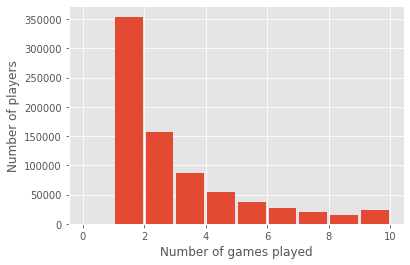

In [20]:
plt.style.use('ggplot')
plt.hist(plays_df['player'].value_counts().values, rwidth=0.9, range=(0,10), bins=10)
#plt.yscale('log')
plt.xlabel('Number of games played')
plt.ylabel('Number of players')
plt.show()

(array([     0., 354159., 156646.,  87275.,  54951.,  37861.,  27300.,
         20394.,  15583.,  22949.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

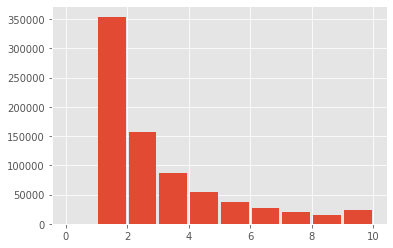

In [21]:
plt.hist(plays_df['player'].value_counts().values, rwidth=0.9, range=(0,10), bins=10)

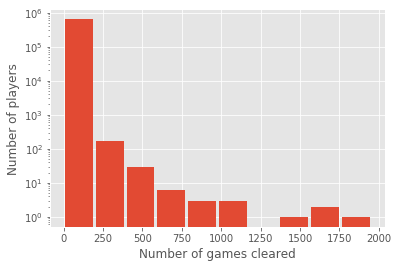

In [22]:
plt.style.use('ggplot')
plt.hist(clears_data['player'].value_counts().values, rwidth=0.9)
plt.yscale('log')
plt.xlabel('Number of games cleared')
plt.ylabel('Number of players')
plt.show()

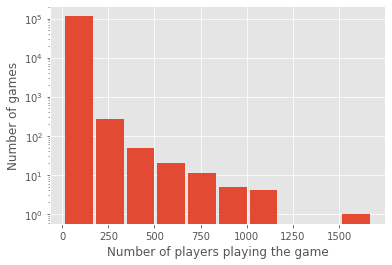

In [23]:
plt.style.use('ggplot')
plt.hist(plays_df['id'].value_counts().values, rwidth=0.9)
plt.yscale('log')
plt.xlabel('Number of players playing the game')
plt.ylabel('Number of games')
plt.show()

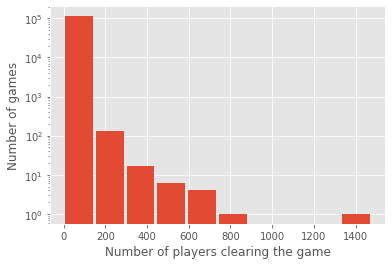

In [24]:
plt.style.use('ggplot')
plt.hist(clears_data['id'].value_counts().values, rwidth=0.9)
plt.yscale('log')
plt.xlabel('Number of players clearing the game')
plt.ylabel('Number of games')
plt.show()

### 3. Baseline recommendation system.

In [30]:
!pip install surprise

     |████████████████████████████████| 6.5MB 2.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678239 sha256=ae1bcb33487ded07880a58f483cc9e98906d9b61861fcd64c962c1c444f59a56
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [25]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [26]:
reader = Reader(rating_scale=(0, 1))

In [27]:
data = Dataset.load_from_df(data_df[['player', 'game', 'clear']], reader)

In [30]:
#data_df.sample(5)

In [28]:
cross_validate(NormalPredictor(), data, cv=2)

{'test_rmse': array([0., 0.]),
 'test_mae': array([0., 0.]),
 'fit_time': (3.695465087890625, 6.118970155715942),
 'test_time': (24.971686124801636, 24.53860902786255)}

Check MSE on test data.